In [68]:
from sklearn.datasets import load_iris, load_diabetes, make_blobs
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
iris = load_iris() # for classification
iris_X = iris.data
iris_y = iris.target

diabetes = load_diabetes() # for regression
diabetes_X = diabetes.data
diabetes_y = diabetes.target

blobs_X, blobs_y = make_blobs(n_samples=100)

# Split datasets into train/test segments
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y)
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y)

## LinearRegression
- `fit(X, y)`
- `predict(X)`
- `score(X, y)`: coefficient of deterination (R^2 score)
- `coef_`: estimated coefficients
- `intercept_`: estimated intercept

In [18]:
from sklearn.linear_model import LinearRegression

# Setup model (init and train)
lr = LinearRegression()
lr.fit(diabetes_X_train, diabetes_y_train)

print("R^2 score:", lr.score(diabetes_X_test, diabetes_y_test))
print("Coefficients:", lr.coef_)
print("Intercepts:", lr.intercept_)

y_pred = lr.predict(diabetes_X_test)

pd.DataFrame({
    'Actual': diabetes_y_test,
    'Predicted': y_pred
}).head()

R^2 score: 0.56355843410772
Coefficients: [  15.76053779 -205.42776084  435.82112661  352.29191066 -851.79152798
  544.15786596   76.1658256    40.72579541  872.55177925   77.25466769]
Intercepts: 150.5847539765581


,Actual,Predicted
0,68.0,123.415815
1,168.0,149.343764
2,84.0,94.139832
3,246.0,235.475006
4,164.0,186.384678


## DecisionTreeClassifier

- `fit(X, y)`
- `predict(X, y)`
- `score(X, y)`
- `apply(X)`
- `decision_path(X)`
- `predict_proba(X)`
- `feature_importances_`
- `get_n_leaves()`

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier()
dt.fit(iris_X_train, iris_y_train)

print("Mean accuracy score:", dt.score(iris_X_test, iris_y_test))

X_leaves = dt.apply(iris_X_test)
decision_paths = dt.decision_path(iris_X_test)
y_pred_proba = dt.predict_proba(iris_X_test)

print ("Feature importances", dt.feature_importances_)

y_pred = dt.predict(iris_X_test)
pd.DataFrame({
    "Actual": iris_y_test,
    "Predicted": y_pred
}).head()

Mean accuracy score: 0.8947368421052632
Feature importances [0.02640264 0.         0.55662071 0.41697665]


,Actual,Predicted
0,0,0
1,1,1
2,2,1
3,2,2
4,2,2


## KNeighborsClassifier

- `fit(X, y)`
- `predict(X, y)`
- `score(X, y)`: mean accuracy score

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris_X_train, iris_y_train)

print("Mean accuracy:", knn.score(iris_X_test, iris_y_test))

pd.DataFrame({
    "Actual": iris_y_test,
    "Predicted": knn.predict(iris_X_test)
}).head()

Mean accuracy: 0.9473684210526315


,Actual,Predicted
0,0,0
1,1,1
2,2,1
3,2,2
4,2,2


## KMeans

- `KMeans(n_clusters=N)`
- `predict(X)`
- `score(X, y)`: (y is ignored)
- `labels_`:
- `cluster_centers_`: cluster centers(get x value by `[:, 0]`, and y by `[:, 1]`)

Accuracy score: -328.4369450185479
Iterations: 1


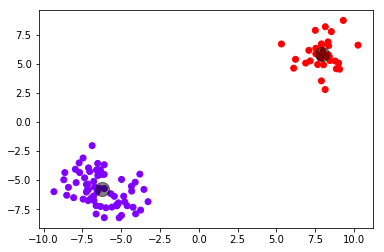

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(blobs_X)

print("Accuracy score:", kmeans.score(blobs_X))
print("Iterations:", kmeans.n_iter_)

plt.scatter(blobs_X[:,0], blobs_X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5);

# Regression Metrics

## R^2 AKA coefficient of determination (default scoring function)
Meaning: proportion of the variance in the dependent variable that is predictable from the independent variable
How to read:

## MAE (mean absolute error)
Meaning:
Best case:
Worst case:

## MSE (mean squared error)
Meaning:
Best case:
Worst case:

# Clasification Metrics

## Mean Accuracy (default scoring function)
Meaning:
Best case:
Worst case:

# Balanced accuracy
sklearn.metrics.balanced_accuracy_score
Meaning: average of recall obtained on each class
Best case: 1
Worst case: 0

## Precision

## Recall

## F1 (precision/recall)
Meaning: 2 * (precision * recall) / (precision + recall)
Best case:
Worst case:

classification_report